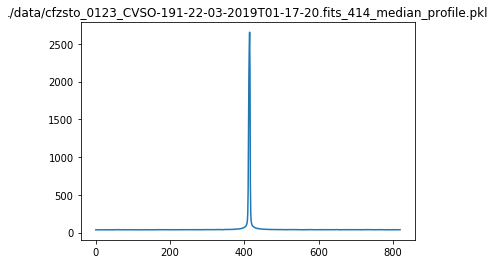

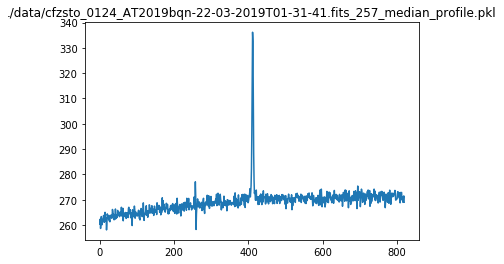

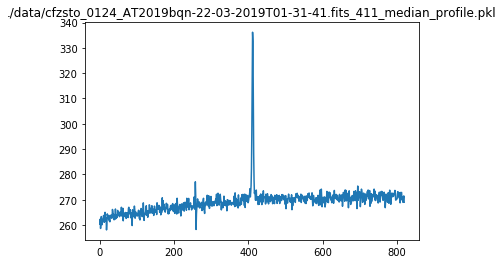

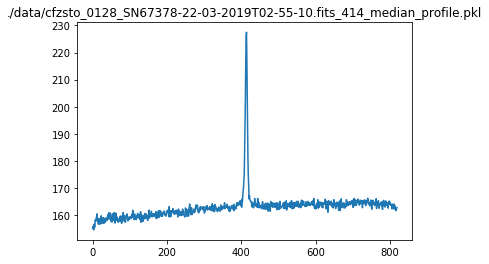

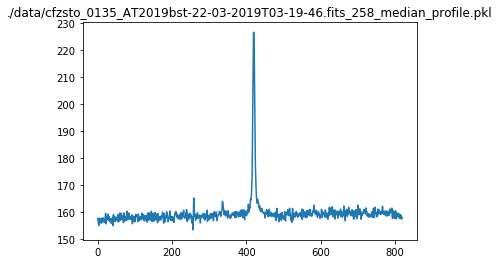

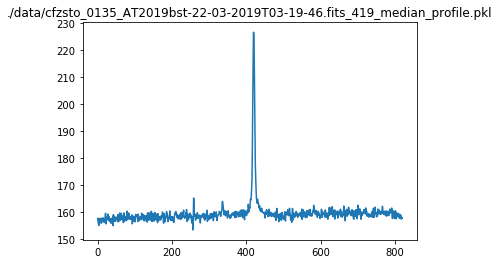

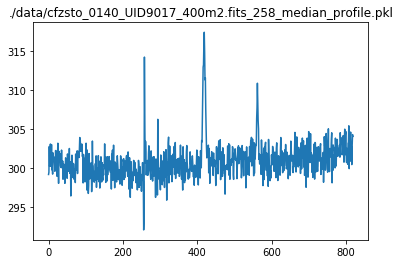

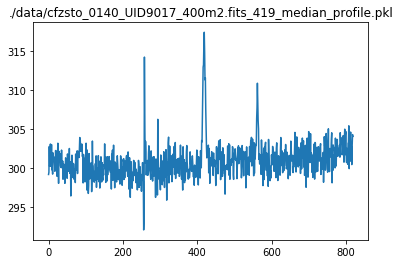

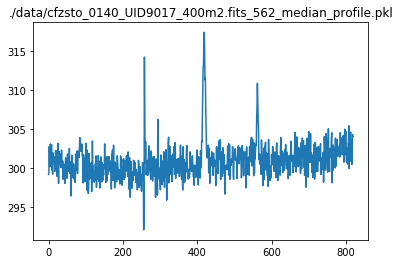

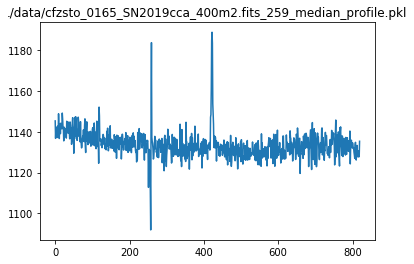

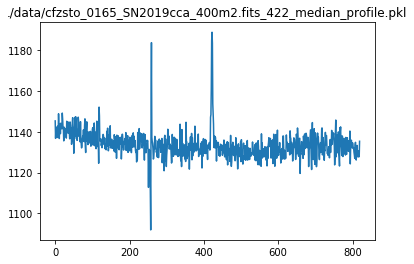

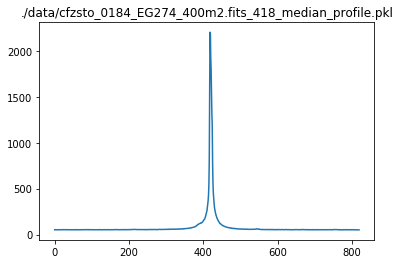

In [1]:
import glob
import pickle
import os
import matplotlib.pyplot as plt

def load_profile(file_name):
    with open(file_name, "rb") as data:
        profile = pickle.load(data)
        return profile

file_list = sorted(glob.glob('./data/*.pkl'))

for _file in file_list:
    _data = load_profile(_file)
    plt.title(_file)
    plt.plot(_data)
    plt.show()
    

In [2]:
test_data = load_profile('./data/cfzsto_0140_UID9017_400m2.fits_419_median_profile.pkl')

In [13]:
from astropy.modeling import fitting, models

fitter = fitting.LevMarLSQFitter()
gaussian = models.Gaussian1D(amplitude=16, mean=419, stddev=8)
print(gaussian)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude  mean stddev
    --------- ----- ------
         16.0 419.0    8.0


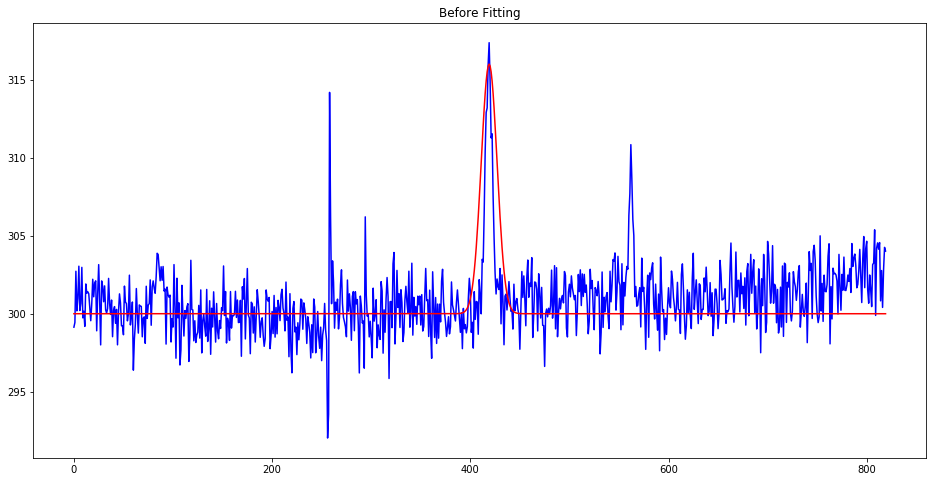

In [14]:
fig, ax = plt.subplots(figsize = (16, 8))

ax.set_title('Before Fitting')
ax.plot(test_data, color='b')
ax.plot(range(len(test_data)), gaussian(range(len(test_data))) + 300, color='r')
plt.show()


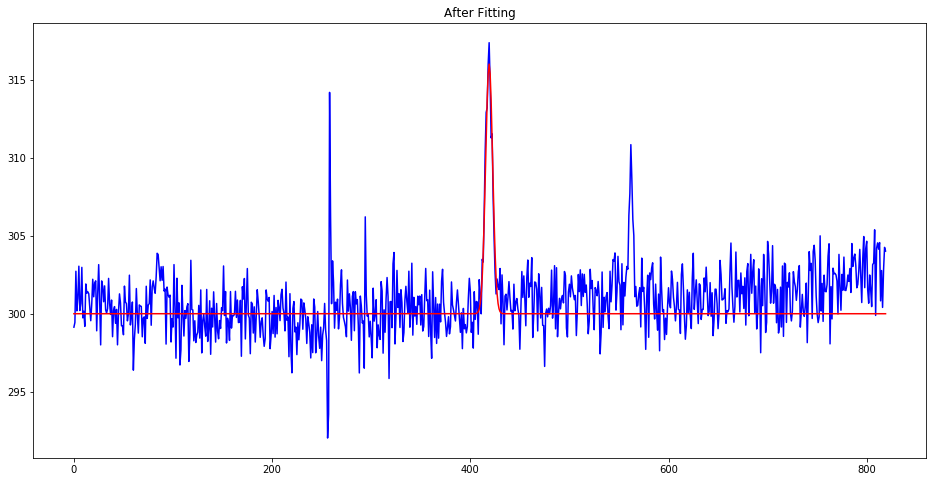

In [15]:
gaussian.mean.fixed = True
gaussian.amplitude.fixed = True
fitted_gaussian = fitter(gaussian, range(len(test_data)), test_data - 300)

fig, ax = plt.subplots(figsize = (16, 8))

ax.set_title('After Fitting')
ax.plot(test_data, color='b')
ax.plot(range(len(test_data)), fitted_gaussian(range(len(test_data))) + 300, color='r')
plt.show()

In [10]:
print(fitted_gaussian)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
      amplitude        mean         stddev   
    ------------- ------------- -------------
    16.1785788424 418.650629547 3.51965238585
